In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Generates N random points for a given linear separator w
## if wTx > 0, y = 1; if wTx < 0, y = -1. wTx = 0 are discarded
def generate_pla(N=20,w0=0,w1=1,w2=1):
    n = 0
    X1 = []
    X2 = []
    Y = []
    while(n < N):
        x1 = random.uniform(-10,10)
        x2 = random.uniform(-10,10)
        y_step = w0 + w1*x1 + w2*x2
        if(y_step == 0):
            continue
        X1.append(x1)
        X2.append(x2)
        if(y_step > 0):
            Y.append(1)
        elif(y_step < 0):
            Y.append(-1)
        n += 1
    data = [np.array([1,X1[i],X2[i],Y[i]]) for i in range(N)]
    return data

In [2]:
f_w0, f_w1, f_w2 = 1, 1, 1
N = 100
training_data = generate_pla(N, f_w0, f_w1, f_w2)
N = 10000
test_data = generate_pla(N, f_w0, f_w1, f_w2)

In [3]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label = "x_2="+str(slope)+"x_1+"+str(intercept) )

In [4]:
import pandas as pd

training = pd.DataFrame(training_data)
training.drop([0], axis = 1, inplace=True)
training.columns = ['x1', 'x2', 'y']

test = pd.DataFrame(test_data)
test.drop([0], axis = 1, inplace=True)
test.columns = ['x1', 'x2', 'y']


In [5]:
training.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      100 non-null    float64
 1   x2      100 non-null    float64
 2   y       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  float64
 2   y       10000 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB


In [6]:
training.to_csv('training_dataset.csv', index=False)
test.to_csv('test_dataset.csv', index=False)

In [7]:
## pla code from the class-activity-1 homework question
train_d = np.array(training)

X = train_d[:, :-1]
y = train_d[:, -1]

X = np.column_stack((np.ones(len(X)), X))
w = np.array([f_w0, f_w1, f_w2])

def pla(X, y, w, etc=1, max_iter=1000):
    for i in range(max_iter):
        for i in range(X.shape[0]):
            s = np.dot(w, X[i])
            if y[i] * s <= 1:
                w = np.add(w, etc * (y[i] - s) * X[i])
    return w

/var/folders/gr/d97pwcz56dz1_vvpw2dc4pk00000gn/T/ipykernel_69196/4075882767.py:15: RuntimeWarning: overflow encountered in double_scalars
  w = np.add(w, etc * (y[i] - s) * X[i])
/var/folders/gr/d97pwcz56dz1_vvpw2dc4pk00000gn/T/ipykernel_69196/4075882767.py:15: RuntimeWarning: invalid value encountered in add
  w = np.add(w, etc * (y[i] - s) * X[i])


[nan nan nan]
error: 1.0


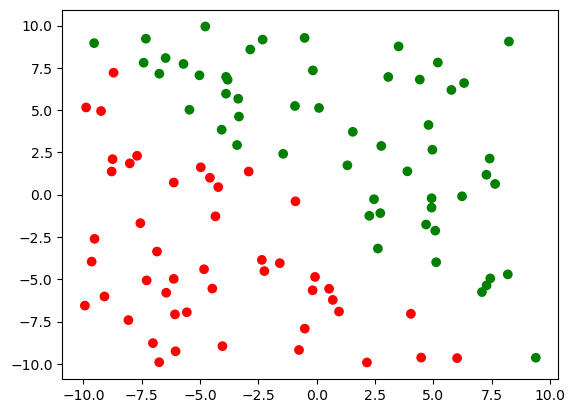

In [8]:
## a)
w_final = pla(X, y, w, 100, 1000)
print(w_final)
plt.scatter(train_d[:, 0], train_d[:, 1], c=ListedColormap(("red", "green"))(y))
abline(-(w_final[1]/w_final[2]), -(w_final[0]/w_final[2]))

predict = np.sign(np.dot(np.column_stack((np.ones(len(test_data)), test[['x1', 'x2']])), w_final))
error = np.mean(predict != test['y'])
print('error:', error)

/var/folders/gr/d97pwcz56dz1_vvpw2dc4pk00000gn/T/ipykernel_69196/4075882767.py:15: RuntimeWarning: overflow encountered in multiply
  w = np.add(w, etc * (y[i] - s) * X[i])
/var/folders/gr/d97pwcz56dz1_vvpw2dc4pk00000gn/T/ipykernel_69196/4075882767.py:15: RuntimeWarning: invalid value encountered in add
  w = np.add(w, etc * (y[i] - s) * X[i])


[inf nan nan]
error: 1.0


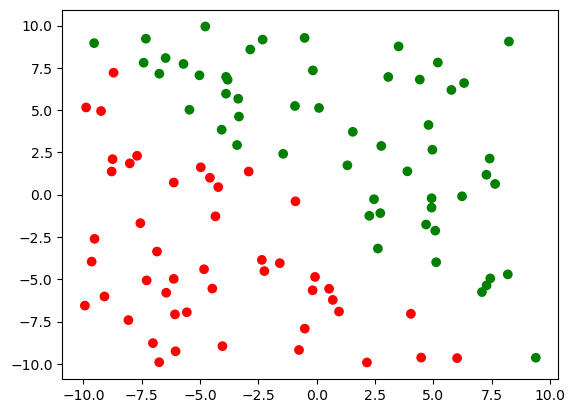

In [9]:
## b)

w_final = pla(X, y, w, 1, 1000)
print(w_final)
plt.scatter(train_d[:, 0], train_d[:, 1], c=ListedColormap(("red", "green"))(y))
abline(-(w_final[1]/w_final[2]), -(w_final[0]/w_final[2]))

predict = np.sign(np.dot(np.column_stack((np.ones(len(test_data)), test[['x1', 'x2']])), w_final))
error = np.mean(predict != test['y'])
print('error:', error)

[2.33579013 2.46973751 2.48385682]
error: 0.0024


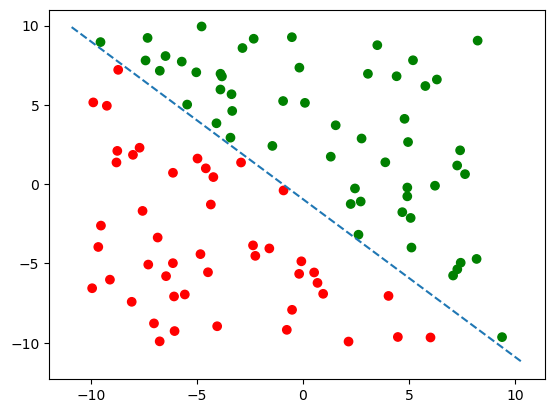

In [10]:
## c)

w_final = pla(X, y, w, 0.01, 1000)
print(w_final)
plt.scatter(train_d[:, 0], train_d[:, 1], c=ListedColormap(("red", "green"))(y))
abline(-(w_final[1]/w_final[2]), -(w_final[0]/w_final[2]))

predict = np.sign(np.dot(np.column_stack((np.ones(len(test_data)), test[['x1', 'x2']])), w_final))
error = np.mean(predict != test['y'])
print('error:', error)

[1.07294051 1.06113812 1.06370185]
error: 0.0006


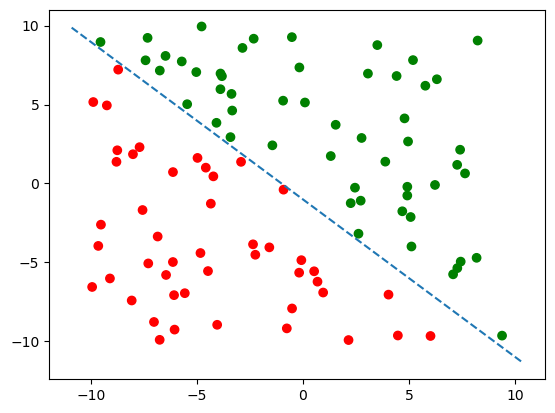

In [11]:
## d)

w_final = pla(X, y, w, 0.0001, 1000)
print(w_final)
plt.scatter(train_d[:, 0], train_d[:, 1], c=ListedColormap(("red", "green"))(y))
abline(-(w_final[1]/w_final[2]), -(w_final[0]/w_final[2]))

predict = np.sign(np.dot(np.column_stack((np.ones(len(test_data)), test[['x1', 'x2']])), w_final))
error = np.mean(predict != test['y'])
print('error:', error)